# Introduction

Notebook to analyze the **True Positive** Results for each model in the context of traceability between features and bug reports.

# Load Libraries and Datasets

In [3]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from modules.models_runner.feat_br_models_runner import Feat_BR_Models_Runner
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import aux_functions
from modules.utils import model_evaluator as m_eval
from modules.utils import similarity_measures as sm

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Volunteers Only Strategy

In [4]:
models_runner_4 = Feat_BR_Models_Runner()
lsi_model_4 = models_runner_4.run_lsi_model()
lda_model_4 = models_runner_4.run_lda_model()
bm25_model_4 = models_runner_4.run_bm25_model()
w2v_model_4 = models_runner_4.run_word2vec_model()

oracle = fd.Feat_BR_Oracles.read_feat_br_volunteers_df().T

evaluator_4 = m_eval.ModelEvaluator(oracle)
evals_df_4 = evaluator_4.run_evaluator(models=[lsi_model_4,lda_model_4,bm25_model_4,w2v_model_4],
                                       top_values=[1,3,5], 
                                       sim_thresholds=[(sm.SimilarityMeasure.COSINE, x/10) for x in range(0,10)])

Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Running LDA model -----
Running BM25 model -----
Running W2V model -----
Feat_BR Volunteers Matrix shape: (91, 19)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Load Datasets

In [5]:
bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)


### Results

In [6]:
evals_df_4.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_1_cosine_0.0,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.0,1.0,Bug_Number 1248267 1248268 125...
1,lsi,top_1_cosine_0.1,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.1,1.0,Bug_Number 1248267 1248268 125...
2,lsi,top_1_cosine_0.2,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.2,1.0,Bug_Number 1248267 1248268 125...
3,lsi,top_1_cosine_0.3,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.3,1.0,Bug_Number 1248267 1248268 125...
4,lsi,top_1_cosine_0.4,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.4,1.0,Bug_Number 1248267 1248268 125...


### Grouping Results by Model

#### Min Precision

model
bm25          11.87
lda            3.74
lsi           12.53
wordvector     7.14
Name: perc_precision, dtype: float64



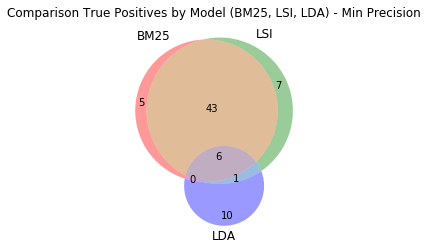

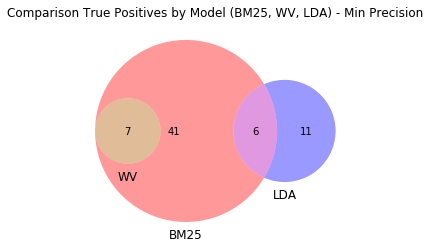

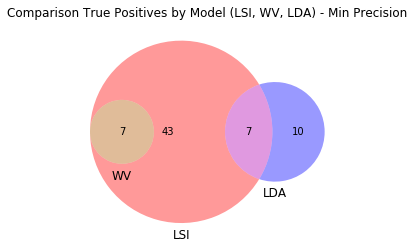

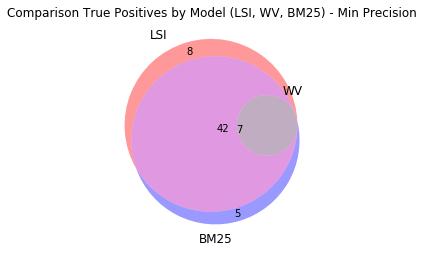

In [11]:
group = evals_df_4.groupby('model').perc_precision.min()
print(group)
print()

bm25_min_prec = group[group.index == 'bm25'].values[0]
lsi_min_prec = group[group.index == 'lsi'].values[0]
lda_min_prec = group[group.index == 'lda'].values[0]
wv_min_prec = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_min_prec))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_min_prec))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_min_prec))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_min_prec))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Min Precision')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'])
plt.title('Comparison True Positives by Model (BM25, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'])
plt.title('Comparison True Positives by Model (LSI, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Min Precision')
plt.show()

##### Exclusive Cases

In [12]:
print("BM25 Exclusive TP:")
display(bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set)

print("\n\nLSI Exclusive TP:")
display(lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set)

print("\n\nLDA Exclusive TP:")
display(lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set)

print("\n\nWV Exclusive TP:")
display(wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set)

BM25 Exclusive TP:


{('apz_async_scrolling', 1287687),
 ('downloads_dropmaker', 1432915),
 ('flac_support', 1295502),
 ('new_awesome_bar', 1451475),
 ('pointer_lock_api', 1314643)}



LSI Exclusive TP:


{('browser_customization', 1301784),
 ('pdf_viewer', 1301056),
 ('pdf_viewer', 1365887),
 ('tts_in_rm', 1335538),
 ('w10_comp', 1279140),
 ('webgl_comp', 1295502),
 ('zoom_indicator', 1305195)}



LDA Exclusive TP:


{('browser_customization', 1248268),
 ('browser_customization', 1336227),
 ('browser_customization', 1449700),
 ('indicator_device_perm', 1290424),
 ('indicator_device_perm', 1357458),
 ('webgl2', 1365887),
 ('webgl_comp', 1312018),
 ('webgl_comp', 1365887),
 ('zoom_indicator', 1316126),
 ('zoom_indicator', 1365887)}



WV Exclusive TP:


set()

##### True Positives Amount by Model

In [13]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 57
LDA TP Amount: 17
BM25 TP Amount: 54
WV TP Amount: 7


#### Max Precision

model
bm25          30.77
lda           10.99
lsi           31.32
wordvector    19.78
Name: perc_precision, dtype: float64



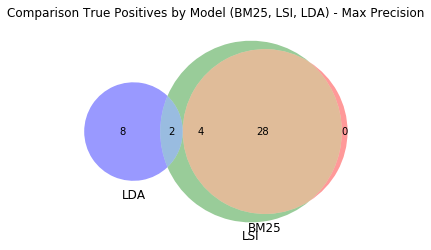

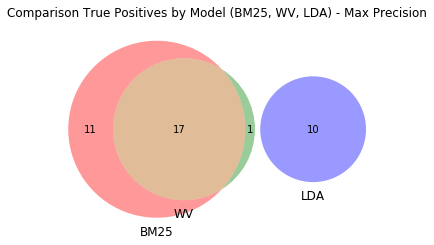

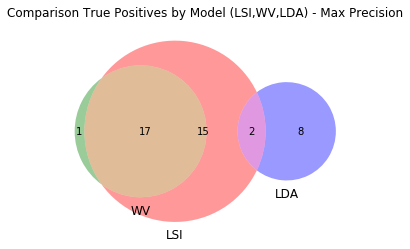

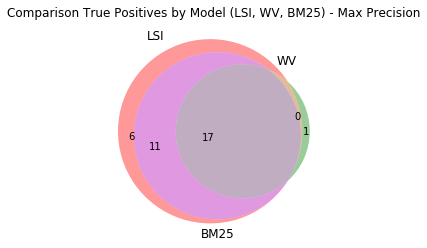

In [14]:
group = evals_df_4.groupby('model').perc_precision.max()
print(group)
print()

bm25_max_prec = group[group.index == 'bm25'].values[0]
lsi_max_prec = group[group.index == 'lsi'].values[0]
lda_max_prec = group[group.index == 'lda'].values[0]
wv_max_prec = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_max_prec))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_max_prec))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_max_prec))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_max_prec))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Max Precision')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'])
plt.title('Comparison True Positives by Model (BM25, WV, LDA) - Max Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'])
plt.title('Comparison True Positives by Model (LSI,WV,LDA) - Max Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Max Precision')
plt.show()

##### Exclusive Cases

In [11]:
print("BM25 Exclusive TP:")
display(bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set)

print("\n\nLSI Exclusive TP:")
display(lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set)

print("\n\nLDA Exclusive TP:")
display(lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set)

print("\n\nWV Exclusive TP:")
display(wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set)

BM25 Exclusive TP:


set()



LSI Exclusive TP:


{('downloads_dropmaker', 1292573),
 ('indicator_device_perm', 1345687),
 ('new_awesome_bar', 1408361),
 ('pdf_viewer', 1301056),
 ('zoom_indicator', 1305195)}



LDA Exclusive TP:


{('browser_customization', 1248268),
 ('browser_customization', 1279140),
 ('browser_customization', 1301784),
 ('browser_customization', 1313290),
 ('browser_customization', 1318903),
 ('browser_customization', 1336227),
 ('browser_customization', 1344446),
 ('browser_customization', 1357458),
 ('browser_customization', 1449700)}



WV Exclusive TP:


{('new_awesome_bar', 1352539), ('new_awesome_bar', 1451475)}

##### True Positives Amount by Model

In [12]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 34
LDA TP Amount: 13
BM25 TP Amount: 23
WV TP Amount: 26


#### Min Recall

model
bm25          28.38
lda            6.81
lsi           13.32
wordvector     6.26
Name: perc_recall, dtype: float64



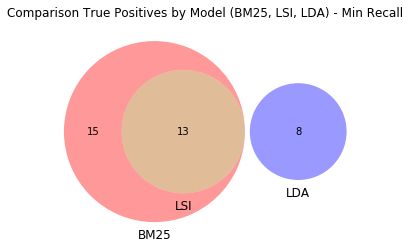

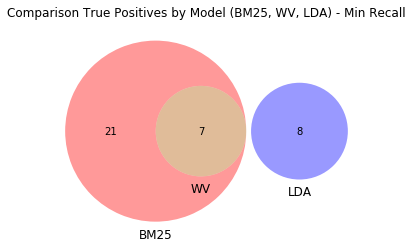

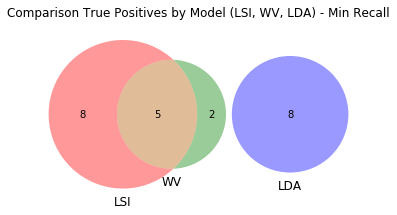

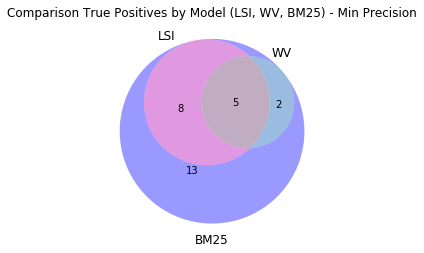

In [10]:
group = evals_df_4.groupby('model').perc_recall.min()
print(group)
print()

bm25_min_recall = group[group.index == 'bm25'].values[0]
lsi_min_recall = group[group.index == 'lsi'].values[0]
lda_min_recall = group[group.index == 'lda'].values[0]
wv_min_recall = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_min_recall))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_min_recall))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_min_recall))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_min_recall))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Min Recall')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'])
plt.title('Comparison True Positives by Model (BM25, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'])
plt.title('Comparison True Positives by Model (LSI, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Min Precision')
plt.show()

##### Exclusive Cases

In [ ]:
print("BM25 Exclusive TP:")
bm25_exc_set = bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set
display(bm25_exc_set)
print("len(bm25_exc_set): {}".format(len(bm25_exc_set)))

print("\n\nLSI Exclusive TP:")
lsi_exc_set = lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set
display(lsi_exc_set)
print("len(bm25_exc_set): {}".format(len(lsi_exc_set)))

print("\n\nLDA Exclusive TP:")
lda_exc_set = lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set
display(lda_exc_set)
print("len(lda_exc_set): {}".format(lda_exc_set))

print("\n\nWV Exclusive TP:")
wv_exc_set = wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set
display(wv_exc_set)
print("len(wv_exc_set: {})".format(wv_exc_set))

##### True Positives Amount by Model

In [12]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 34
LDA TP Amount: 13
BM25 TP Amount: 23
WV TP Amount: 26


#### Max Recall

model
bm25          48.22
lda           48.41
lsi           52.06
wordvector    41.13
Name: perc_recall, dtype: float64



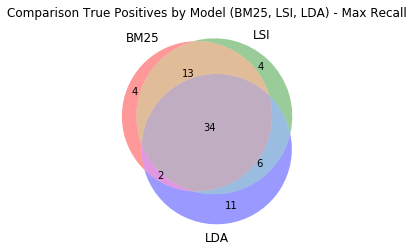

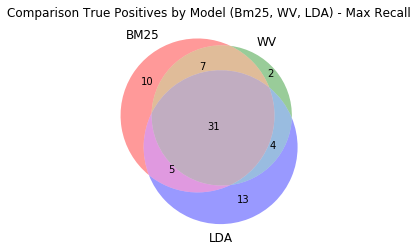

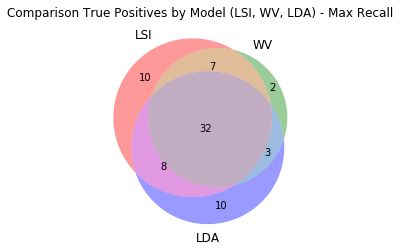

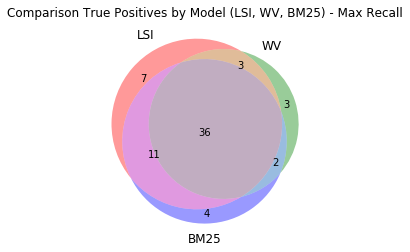

In [13]:
group = evals_df_4.groupby('model').perc_recall.max()
print(group)
print()

bm25_max_recall = group[group.index == 'bm25'].values[0]
lsi_max_recall = group[group.index == 'lsi'].values[0]
lda_max_recall = group[group.index == 'lda'].values[0]
wv_max_recall = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_max_recall))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_max_recall))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_max_recall))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_max_recall))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Max Recall')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'])
plt.title('Comparison True Positives by Model (Bm25, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'])
plt.title('Comparison True Positives by Model (LSI, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Max Recall')
plt.show()

##### Exclusive Cases

In [14]:
print("BM25 Exclusive TP:")
display(bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set)

print("\n\nLSI Exclusive TP:")
display(lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set)

print("\n\nLDA Exclusive TP:")
display(lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set)

print("\n\nWV Exclusive TP:")
display(wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set)

BM25 Exclusive TP:


{('apz_async_scrolling', 1295502),
 ('flac_support', 1335538),
 ('pointer_lock_api', 1314643)}



LSI Exclusive TP:


{('pdf_viewer', 1301056), ('pdf_viewer', 1365887), ('tts_in_rm', 1335538)}



LDA Exclusive TP:


{('browser_customization', 1248268),
 ('browser_customization', 1313290),
 ('browser_customization', 1336227),
 ('browser_customization', 1449700),
 ('indicator_device_perm', 1290424),
 ('new_awesome_bar', 1278388),
 ('new_awesome_bar', 1313778),
 ('webgl_comp', 1312018),
 ('webgl_comp', 1365887)}



WV Exclusive TP:


{('indicator_device_perm', 1430603)}

##### True Positives Amount by Model

In [15]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 57
LDA TP Amount: 53
BM25 TP Amount: 53
WV TP Amount: 44
